<h1 align="center"> Assignment 2 </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Q1, Q2 and Q4
(Q3 after this)

The `data_gen` function generates the random data and the `logistic_regression` function does the Logistic Regression along with L1 or L2 regularization (whatever is specified).

In [2]:
def data_gen(m, n, theta) :

    data = np.concatenate((np.ones((n,1)), np.random.random((n, m-1))*2 - 1), axis=1)
    beta = np.random.random((m, 1))*2 - 1
    z = np.matmul(data, beta)
    y = np.array([])

    for i in range(n) :
        if z[i][0] > 0 : y = np.append(y, 1)
        else : y = np.append(y, 0)

    noise = np.array([np.random.binomial(1, theta) for i in range(n)])
    y = (np.add(y, noise)%2).reshape((n, 1))

    return data, beta, y


def logistic_regression(m, n, theta, k, t, l, lambda_, l1=False, l2=False):

    data, beta, y = data_gen(m, n, theta)
    beta_pred = np.random.random((m, 1))*2 - 1

    cost_previous = 0
    itr = 0

    for i in range(k):
        ypred = 1/(1 + np.exp(-np.matmul(data, beta_pred)))
        dbeta = np.where(beta_pred > 0, 1, -1)
        beta_pred = beta_pred - ((l/n) * np.matmul(data.T, (ypred - y))) - l1*(lambda_ * dbeta) - l2*(lambda_ * beta_pred)
        y, ypred = y.reshape(n), ypred.reshape(n)
        cost_current = (-1/n) * (np.dot(y, np.log(ypred)) + np.dot((1 - y), np.log(1 - ypred))) + l1*(lambda_ * np.sum(np.abs(beta_pred))) + l2*(lambda_ * np.sum(beta_pred**2) / 2)
        y, ypred = y.reshape(n,1), ypred.reshape(n,1)
        if abs(cost_current - cost_previous) < t : break
        cost_previous = cost_current
        itr += 1
    
    return data, y, ypred, beta, itr, beta_pred, cost_current


m = 3
n = 10
theta = 0.2
k = 1000000
t = 0.0000001
l = 0.0001
lambda_ = 0.5
l1 = False
l2 = False

data, y, ypred, beta, itr, beta_pred, cost_current = logistic_regression(m, n, theta, k, t, l, lambda_, l1, l2)

print("\nX:\n", data)
print("\nY:\n", y)
print("\nβ (original):\n", beta)
print("\nβ (estimated):\n", beta_pred)
print(f"\nIt took {itr} iterations and cost is {cost_current}\n")


X:
 [[ 1.         -0.59043716 -0.99909951]
 [ 1.         -0.09851094 -0.05581158]
 [ 1.          0.47168415 -0.68671084]
 [ 1.          0.12756779  0.89160376]
 [ 1.          0.54359422 -0.6078796 ]
 [ 1.          0.3564209   0.66397111]
 [ 1.          0.93406127 -0.57618312]
 [ 1.          0.18120658 -0.9937599 ]
 [ 1.          0.03524315  0.89371365]
 [ 1.         -0.13987261  0.96787927]]

Y:
 [[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

β (original):
 [[ 0.76594038]
 [-0.77049676]
 [-0.37803537]]

β (estimated):
 [[ 2.25895952]
 [-0.68211552]
 [ 0.62059088]]

It took 235051 iterations and cost is 0.2833361237109767



# Q3

To see how $n$ and $\theta$ affect the model, I have plotted `n` vs `theta` vs `MSE`. It can be clearly seen that as the number of samples decrease and as the probability of flipping increases, the MSE increases.

As stated in assignment 1, with too few samples, the model does not have enough information to learn the underlying pattern at all and noise due to the bernoulli random variable even worsens this problem. So the model is underfitted and it will perform poorly even on the training data.

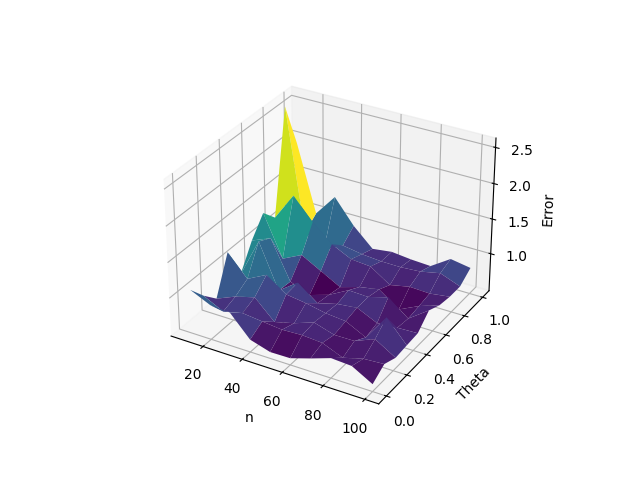

In [3]:
%matplotlib widget

dp = 10

n_values = np.linspace(10, 100, dp)
theta_values = np.linspace(0, 1, dp)

n_values, theta_values = np.meshgrid(n_values, theta_values)
errors = np.zeros_like(n_values)

itrs = 0

for i in range(n_values.shape[0]):
    for j in range(n_values.shape[1]):
        data, y, ypred, beta, itr, beta_pred, cost_current = logistic_regression(int(n_values[i, j]), m, theta_values[i,j], k, t, l, lambda_)
        error = np.mean((beta - beta_pred)**2)
        errors[i, j] = error
        itrs+=1
        print(f'{itrs}/{dp**2}', end='\r')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(n_values, theta_values, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('Theta')
ax.set_zlabel('Error')
plt.show()

# Q3 continued

Derivating partial differentiation of log cost with respect to parameters

\begin{aligned}

\frac{\partial}{\partial \beta_j} J(\beta) & =\frac{\partial}{\partial \beta_j} \frac{-1}{m} \sum_{i=1}^m\left[y^{(i)} \log \left(h_\beta\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_\beta\left(x^{(i)}\right)\right)\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[y^{(i)} \frac{\partial}{\partial \beta_j} \log \left(h_\beta\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \frac{\partial}{\partial \beta_j} \log \left(1-h_\beta\left(x^{(i)}\right)\right)\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[\frac{y^{(i)} \frac{\partial}{\partial \beta_j} h_\beta\left(x^{(i)}\right)}{h_\beta\left(x^{(i)}\right)}+\frac{\left(1-y^{(i)}\right) \frac{\partial}{\partial \beta_j}\left(1-h_\beta\left(x^{(i)}\right)\right)}{1-h_\beta\left(x^{(i)}\right)}\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[\frac{y^{(i)} \frac{\partial}{\partial \beta_j} \sigma\left(\beta^T x^{(i)}\right)}{h_\beta\left(x^{(i)}\right)}+\frac{\left(1-y^{(i)}\right) \frac{\partial}{\partial \beta_j}\left(1-\sigma\left(\beta^T x^{(i)}\right)\right)}{1-h_\beta\left(x^{(i)}\right)}\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[\frac{y^{(i)} \sigma\left(\beta^T x^{(i)}\right)\left(1-\sigma\left(\beta^T x^{(i)}\right)\right) \frac{\partial}{\partial \beta_j} \beta^T x^{(i)}}{h_\beta\left(x^{(i)}\right)}+\frac{-\left(1-y^{(i)}\right) \sigma\left(\beta^T x^{(i)}\right)\left(1-\sigma\left(\beta^T x^{(i)}\right)\right) \frac{\partial}{\partial \beta_j} \beta^T x^{(i)}}{1-h_\beta\left(x^{(i)}\right)}\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[\frac{y^{(i)} h_\beta\left(x^{(i)}\right)\left(1-h_\beta\left(x^{(i)}\right)\right) \frac{\partial}{\partial \beta_j} \beta^T x^{(i)}}{h_\beta\left(x^{(i)}\right)}-\frac{\left(1-y^{(i)}\right) h_\beta\left(x^{(i)}\right)\left(1-h_\beta\left(x^{(i)}\right)\right) \frac{\partial}{\partial \beta_j} \beta^T x^{(i)}}{1-h_\beta\left(x^{(i)}\right)}\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[y^{(i)}\left(1-h_\beta\left(x^{(i)}\right)\right) x_j^{(i)}-\left(1-y^{(i)}\right) h_\beta\left(x^{(i)}\right) x_j^{(i)}\right] \\

& =-\frac{1}{m} \sum_{i=1}^m\left[y^{(i)}\left(1-h_\beta\left(x^{(i)}\right)\right)-\left(1-y^{(i)}\right) h_\beta\left(x^{(i)}\right)\right] x_j^{(i)} \\

& =-\frac{1}{m} \sum_{i=1}^m\left[y^{(i)}-y^{(i)} h_\beta\left(x^{(i)}\right)-h_\beta\left(x^{(i)}\right)+y^{(i)} h_\beta\left(x^{(i)}\right)\right] x_j^{(i)} \\

& =-\frac{1}{m} \sum_{i=1}^m\left[y^{(i)}-h_\beta\left(x^{(i)}\right)\right] x_j^{(i)} \\

& =\frac{1}{m} \sum_{i=1}^m\left[h_\beta\left(x^{(i)}\right)-y^{(i)}\right] x_j^{(i)} \\

\end{aligned}

# Q4 continued

L1 regularization did not make much difference because it has tendency to assign zero value to some weights. But since the betas are randomly generated, it is less likely that they have negligible weight. So, L2 regularization fares better here, since the weight values are spread more evenly.

A high value of the regularization constant increases the penalty on the magnitude of the weights. This leads to a model with smaller weights, making the model simpler and more likely to underfit the data.

A low value of the regularization constant decreases the penalty on the magnitude of the weights. This allows the model to have larger weights, making the model more complex and more likely to overfit the data.

The optimal value of the regularization constant strikes a balance between underfitting and overfitting. It penalizes the weights just enough to prevent the model from overfitting the data, but not so much that the model becomes overly simplified and underfits the data. 

# Q5

This is the most object oriented code I could write. I have also used the concept of both Inheritance and Polymorphism.

In [4]:
import numpy as np

class Regression:
    def __init__(self, n, m, k, tau, l_rate, lambda_ = 0, l1 = False, l2 = False):
        self.n = n
        self.m = m
        self.k = k
        self.tau = tau
        self.l_rate = l_rate
        self.lambda_ = lambda_
        self.l1 = l1
        self.l2 = l2

    def generate_X(self, n, m, a = 0, b = 1):
        X = np.concatenate((np.ones((n, 1)), ((b-a)*np.random.rand(n, m-1) + a)), axis=1)
        return X

    def generate_beta(self, a = 0, b = 1):
        return (b-a)*np.random.rand(self.m, 1) + a
    
    def fit(self, X, Y):
        beta_pred = self.generate_beta()
        cost_previous = 0
        itr = 0

        for _ in range(self.k):
            Y_pred = self.calculate_label(X, beta_pred)
            gradient = (np.matmul(X.T, (Y_pred - Y)) / self.n) + self.l1 * (self.lambda_ * np.sign(beta_pred)) + self.l2 * (self.lambda_ * beta_pred)
            beta_pred -= self.l_rate * gradient
            cost_current = self.cost(Y, Y_pred, beta_pred)
            if abs(cost_current - cost_previous) < self.tau:
                break
            cost_previous = cost_current
            itr += 1
        
        self.beta_pred = beta_pred
        self.cost_current = cost_current
    
    def calculate_label(self, X, beta):
        raise NotImplementedError("Use calculate_label method from subclass")
    
    def cost(self, Y, Y_pred, beta):
        raise NotImplementedError("Use cost method from subclass")


class LinearRegression(Regression):
    def __init__(self, sigma, n, m, k, tau, l_rate, lambda_ = 0, l1 = False, l2 = False):
        super().__init__(n, m, k, tau, l_rate, lambda_, l1, l2)
        self.beta = super().generate_beta()
        self.sigma = sigma

    def calculate_label(self, X, beta):
        return np.matmul(X, beta)
    
    def generate_data(self):
        X = super().generate_X(self.n, self.m)
        Y = self.calculate_label(X, self.beta) + np.random.normal(0, self.sigma, (self.n, 1))
        return X, Y
    
    def cost(self, Y, Y_pred, beta):
        return (np.mean((Y - Y_pred)**2)/2
                + self.l1 * (self.lambda_ * np.sum(np.abs(beta)))
                + self.l2 * ((self.lambda_ / 2) * np.sum(beta**2)))

    def predict(self, X):
        return self.calculate_label(X, self.beta_pred)


class LogisticRegression(Regression):
    def __init__(self, theta, epsilon, n, m, k, tau, l_rate, lambda_ = 0, l1 = False, l2 = False):
        super().__init__(n, m, k, tau, l_rate, lambda_, l1, l2)
        self.beta = super().generate_beta(-1, 1)
        self.theta = theta
        self.epsilon = epsilon 

    def calculate_label(self, X, beta):
        return np.where((1/(1 + np.exp(-np.matmul(X, beta)))) > 0.5, 1, 0)
    
    def generate_data(self):
        X = super().generate_X(self.n, self.m, -1, 1)
        Y = np.add(self.calculate_label(X, self.beta), np.random.binomial(1, self.theta, (self.n, 1)))%2
        return X, Y
    
    def cost(self, Y, Y_pred, beta):
        return (-np.mean(Y * np.log(Y_pred + self.epsilon) + (1 - Y) * np.log(1 - Y_pred + self.epsilon))
                + self.l1 * (self.lambda_ * np.sum(np.abs(beta)))
                + self.l2 * ((self.lambda_ / 2) * np.sum(beta**2)))

    def predict(self, X):
        return self.calculate_label(X, self.beta_pred)


# from sklearn.metrics import root_mean_squared_error, accuracy_score

# lr = LinearRegression(n=10000, m=3, sigma=0.2, k=100000, l_rate=0.0000001, tau=0.00001)

# x = lr.generate_X(10, 3)
# X_train, Y_train = lr.generate_data()
# lr.fit(X_train, Y_train)
# y_true, y_pred = lr.calculate_label(x, lr.beta), lr.predict(x)

# rmse = root_mean_squared_error(y_true, y_pred)
# print(f"RMSE: {rmse}")

# lr = LogisticRegression(n=1000, m=3, theta=0.2, k=100000, tau=0.0000001, l_rate=0.00001, epsilon=0.00001, lambda_=1, l2=True)

# x = lr.generate_X(10, 3)
# X_train, Y_train = lr.generate_data()
# lr.fit(X_train, Y_train)
# y_true, y_pred = lr.calculate_label(x, lr.beta), lr.predict(x)
# print(f"Accuracy: {accuracy_score(y_true, y_pred)}")